In [1]:
load('../temp.rda')

In [2]:
library(data.table)

In [3]:
ls()

[1] "key.match"     "noncore.match"

In [4]:
nrow(key.match)

[1] 623

In [5]:
length(unique(key.match$q))

[1] 465

In [6]:
#bad <- key.match[type == 'A*01:04N']
#good <- key.match[type == 'A*01:01']
wrong <- c('DRB1*14:01', 'DRB1*14:54')
good1 <- key.match[type == wrong[1]]
bad1 <- key.match[type == wrong[2]]
rest1 <- key.match[!type %in% wrong]
good2 <- noncore.match[type == wrong[1]]
bad2 <- noncore.match[type == wrong[2]]
rest2 <- noncore.match[!type %in% wrong]
rest <- rbind(rest1, rest2)

In [7]:
table(bad1$EXON)


E2 
24 

In [8]:
table(good1$EXON)


E2 
24 

In [9]:
table(bad2$EXON)
table(good2$EXON)


E1 E3 
27 49 


E1 E3 
27 22 

In [10]:
good <- good2[EXON == 'E3'][order(ts), .(ts, te, q)]

In [11]:
bad <- bad2[EXON == 'E3'][order(ts), .(ts, te, q)]

In [13]:
library(IRanges)

In [14]:
ir.good <- IRanges(good$ts, good$te, names = good$q)
good.col <- ifelse(names(ir.good) %in% rest$q, 'gray50', 'black')

In [15]:
ir.good

IRanges of length 22
     start end width                      names
[1]      1  12    12 H5JCKCCXX:4:12:2540349:0/1
[2]      1  15    15   H5JCKCCXX:4:2:783370:0/2
[3]     19  68    50  H5JCKCCXX:4:4:3412294:0/1
[4]     19  68    50   H5JCKCCXX:6:5:824326:0/1
[5]     21  70    50  H5JCKCCXX:8:9:1746223:0/1
...    ... ...   ...                        ...
[18]    62  93    32  H5JCKCCXX:8:8:2564539:0/1
[19]    65  93    29 H5JCKCCXX:4:13:2777538:0/2
[20]    72  93    22  H5JCKCCXX:2:9:2382078:0/2
[21]    73  93    21    H5JCKCCXX:6:6:16638:0/2
[22]    82  93    12   H5JCKCCXX:4:2:783370:0/1

In [16]:
ir.bad <- IRanges(bad$ts, bad$te, names = bad$q)
bad.col <- ifelse(names(ir.bad) %in% rest$q, 'gray50', 'black')

In [17]:
plotRanges <- function(x, xlim = x, main = deparse(substitute(x)), col = "black", sep = 0.5, ...)
 {
 height <- 1
 if (is(xlim, "Ranges"))
 xlim <- c(0, max(end(xlim)))
 bins <- disjointBins(IRanges(start(x), end(x) + 1))
 plot.new()
 plot.window(xlim, c(0, max(bins)*(height + sep)))
 ybottom <- bins * (sep + height) - height
 rect(start(x)-0.5, ybottom, end(x)+0.5, ybottom + height, col = col, ...)
 title(main)
 axis(1)
 }

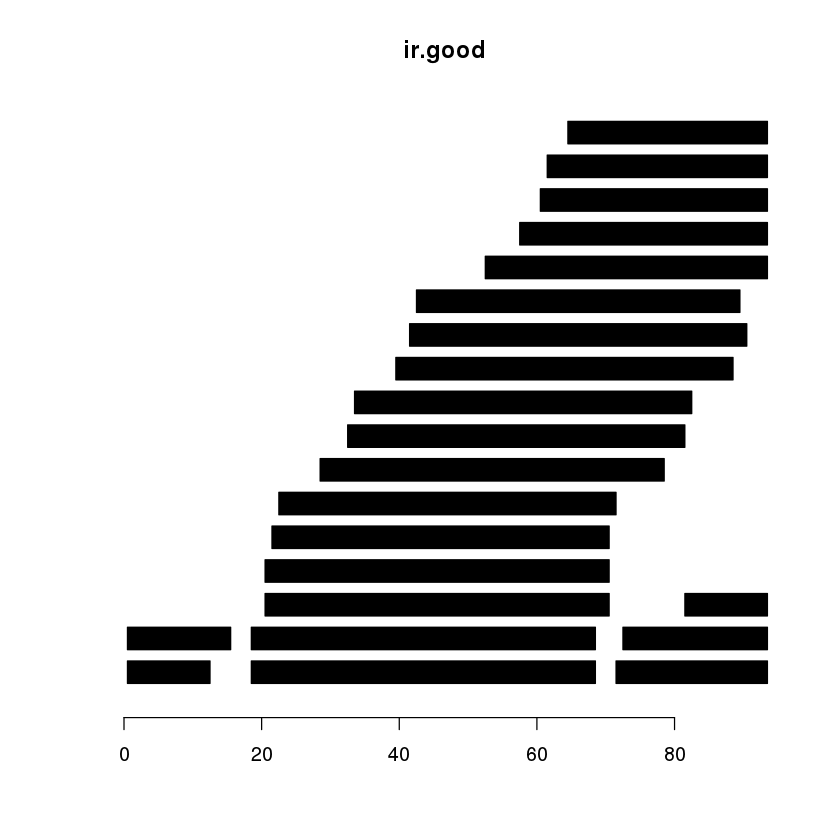

In [18]:
plotRanges(ir.good, col = good.col)

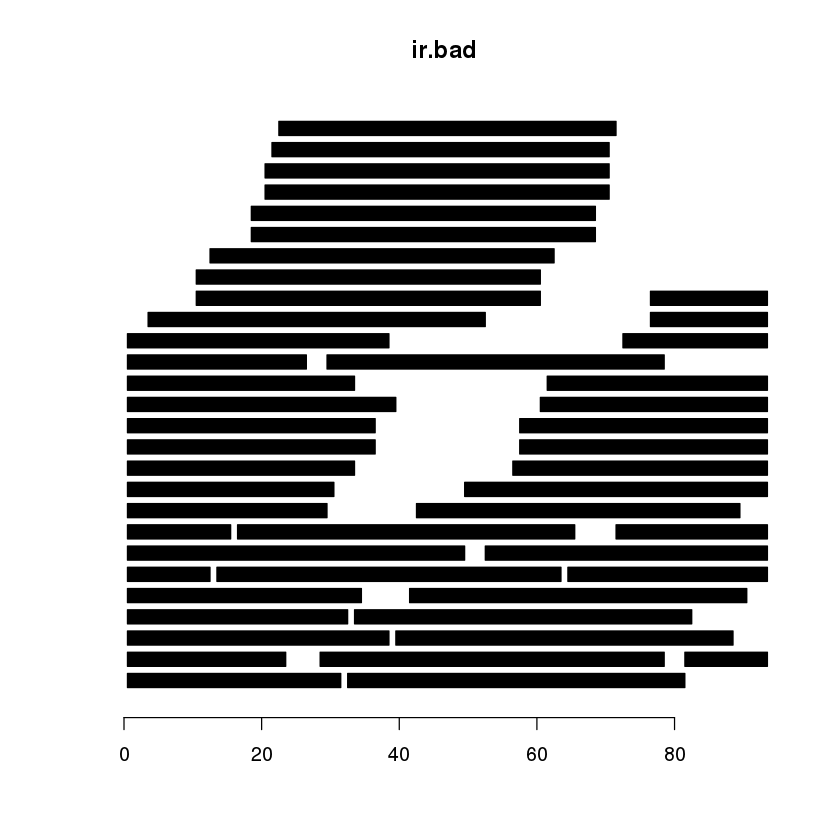

In [19]:
plotRanges(ir.bad, col = bad.col)

In [21]:
save(good, bad, plotRanges, ir.good, ir.bad, good.col, bad.col, file = 'wrong/wrong.187521906.rda')

In [22]:
pdf('wrong/wrong.187521906.good.pdf')
plotRanges(ir.good, col = good.col)
dev.off()
pdf('wrong/wrong.187521906.bad.pdf')
plotRanges(ir.bad, col = bad.col)
dev.off()

pdf 
  2

pdf 
  2

In [27]:
reduce(ir.bad)

IRanges of length 1
    start end width
[1]     1  89    89

In [31]:
ir.bad[1:10]

IRanges of length 10
     start end width
[1]      1  12    12
[2]      1  10    10
[3]      1  17    17
[4]      1  12    12
[5]      1  11    11
[6]      1  11    11
[7]      1  11    11
[8]      1  18    18
[9]      1  29    29
[10]     1  29    29

In [32]:
hla <- fread('data/hla.tsv')

Warning message:
In fread("data/hla.tsv"): Bumped column 8 to type character on data row 1046, field contains 'GA'. Coercing previously read values in this column from logical, integer or numeric back to character which may not be lossless; e.g., if '00' and '000' occurred before they will now be just '0', and there may be inconsistencies with treatment of ',,' and ',NA,' too (if they occurred in this column before the bump). If this matters please rerun and set 'colClasses' to 'character' for this column. Please note that column type detection uses the first 5 rows, the middle 5 rows and the last 5 rows, so hopefully this message should be very rare. If reporting to datatable-help, please rerun and include the output from verbose=TRUE.

In [33]:
head(hla)

,V1,V2,V3,V4,V5,V6,V7,V8,V9
1,DPB1*01:01-E1-L33-pre--suf-G-suf2-,DPB1*01:01,E1,33,33,,G,,MMVLQVSAAPRTVALTALLMVLLTSVVQGRATP
2,DPB1*01:01-E2-L87-pre-AG-suf-G-suf2-,DPB1*01:01,E2,87,87,AG,G,,NYVYQGRQECYAFNGTQRFLERYIYNREEYARFDSDVGEFRAVTELGRPAAEYWNSQKDILEEKRAVPDRVCRHNYELDEAVTLQRR
3,DPB1*01:01-E3-L93-pre-TC-suf-A-suf2-,DPB1*01:01,E3,93,93,TC,A,,QPKVNVSPSKKGPLQHHNLLVCHVTDFYPGSIQVRWFLNGQEETAGVVSTNLIRNGDWTFQILVMLEMTPQQGDVYICQVEHTSLDSPVTVEW
4,DPB1*01:01-E4-L36-pre-AG-suf-G-suf2-,DPB1*01:01,E4,36,36,AG,G,,AQSDSAQSKTLTGAGGFVLGLIICGVGIFMHRRSKK
5,DPB1*02:01-E1-L33-pre--suf-G-suf2-,DPB1*02:01,E1,33,33,,G,,MMVLQVSAAPRTVALTALLMVLLTSVVQGRATP
6,DPB1*02:01-E2-L87-pre-AG-suf-*-suf2-,DPB1*02:01,E2,87,87,AG,*,,NYLFQGRQECYAFNGTQRFLERYIYNREEFVRFDSDVGEFRAVTELGRPDEEYWNSQKDILEEERAVPDRMCRHNYELGGPMTLQRR


In [34]:
exons <- dcast(hla, V2~V3)

Using 'V9' as value column. Use 'value.var' to override
Aggregate function missing, defaulting to 'length'


In [35]:
exons

ERROR: Error in rbindlist(l, use.names, fill, idcol): Item 2 of list input is not a data.frame, data.table or list


               V2 E1 E2 E3 E4 E5 E6 E7 E8
    1:    A*01:01  1  1  1  1  1  1  1  0
    2:   A*01:01L  1  1  1  1  1  1  1  0
    3:   A*01:01N  1  1  1  1  1  1  1  0
    4:    A*01:02  1  1  1  1  1  1  1  0
    5:    A*01:03  1  1  1  1  1  1  1  0
   ---                                   
10226: DRB5*02:06  0  1  1  0  0  0  0  0
10227: DRB6*02:01  0  1  1  1  0  0  0  0
10228: DRB7*01:01  1  1  1  1  0  0  0  0
10229: DRB8*01:01  0  0  1  1  0  0  0  0
10230: DRB9*01:01  0  1  0  0  0  0  0  0

In [39]:
colSums(data.frame(exons)[,-1])

E1    E2    E3    E4    E5    E6    E7    E8 
 1636 10256  8219  2997  1389   979   904     1

In [40]:
en <- exons$V2
tt <- exons[, V2:=NULL]

In [43]:
es <- grep('^A', en)
print(length(es))
colSums(exons[es])

[1] 2467


E1   E2   E3   E4   E5   E6   E7   E8 
 404 2467 2470  898  427  265  265    0

In [44]:
es <- grep('^B', en)
print(length(es))
colSums(exons[es])

[1] 3138


E1   E2   E3   E4   E5   E6   E7   E8 
 650 3139 3142 1146  601  374  366    0

In [45]:
es <- grep('^C', en)
print(length(es))
colSums(exons[es])

[1] 2078


E1   E2   E3   E4   E5   E6   E7   E8 
 375 2082 2082  663  361  340  273    1

In [46]:
es <- grep('^DRB1', en)
print(length(es))
colSums(exons[es])

[1] 1361


E1   E2   E3   E4   E5   E6   E7   E8 
 113 1376  194  142    0    0    0    0

In [47]:
es <- grep('^DQB1', en)
print(length(es))
colSums(exons[es])

[1] 615


E1  E2  E3  E4  E5  E6  E7  E8 
 54 617 225  83   0   0   0   0

In [48]:
es <- grep('^DPB1', en)
print(length(es))
colSums(exons[es])

[1] 488


E1  E2  E3  E4  E5  E6  E7  E8 
 30 492  71  49   0   0   0   0

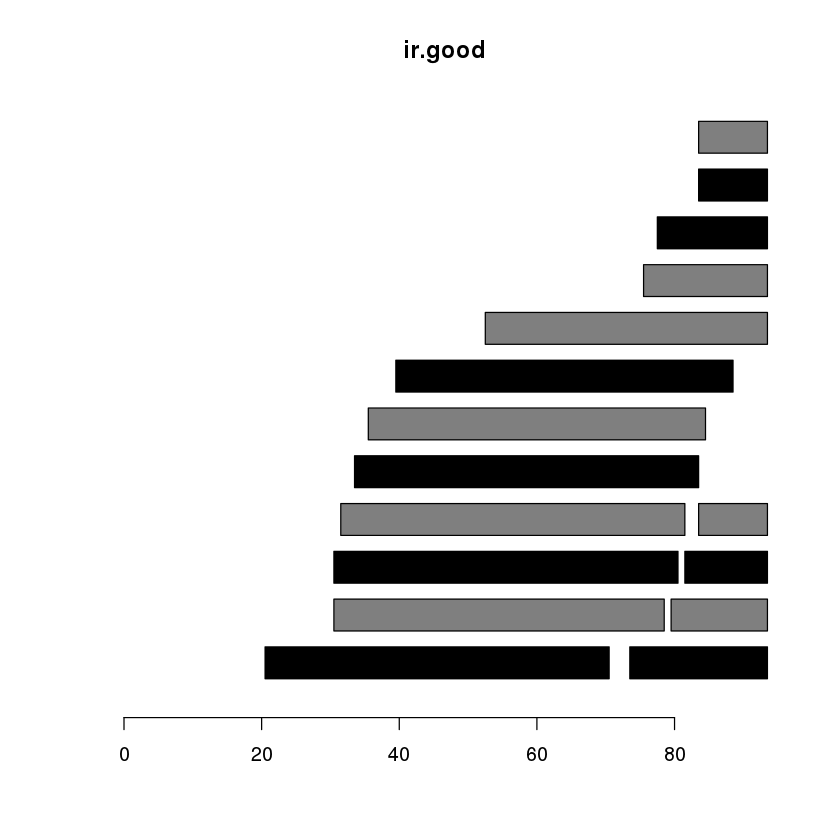

In [91]:
plotRanges2 <- function(x, xlim = x, main = deparse(substitute(x)), col = "black", sep = 0.5, ...)
 {
 height <- 1
 if (is(xlim, "Ranges"))
 xlim <- c(0, max(end(xlim)))
 bins <- disjointBins(IRanges(start(x), end(x) + 1))
 plot.new()
 plot.window(xlim, c(0, max(bins)*(height + sep)))
 ybottom <- bins * (sep + height) - height
 rect(start(x)-0.5, ybottom, end(x)+0.5, ybottom + height, col = col, ...)
 title(main)
 axis(1)
 }
plotRanges2(ir.good, col = rep(c('black', 'gray50'), 8))

In [92]:
?IRanges

IRanges-constructor {IRanges},R Documentation
"start, end, width","For IRanges and solveUserSEW0: NULL, or vector of integers (eventually with NAs). For solveUserSEW: vector of integers (eventually with NAs)."
names,A character vector or NULL.
refwidths,Vector of non-NA non-negative integers containing the reference widths.
rep.refwidths,TRUE or FALSE. Use of rep.refwidths=TRUE is supported only when refwidths is of length 1.
"translate.negative.coord, allow.nonnarrowing",TRUE or FALSE.
